In [56]:
import pandas as pd
import nltk

from nltk.corpus import stopwords
from textblob import Word, TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [42]:
def clean_text(text):
    text = text.str.lower()
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace("\n" , '')
    text = text.str.replace('\d', '')
    return text

In [43]:
def remove_stopwords(text):
    sw = stopwords.words('english')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    return text

In [44]:
df = pd.read_csv('wiki_data.csv')

In [45]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [46]:
df['text'] = clean_text(df['text'])

/var/folders/4v/qy3j96gj6tg3_y8rx_rtdpzr0000gn/T/ipykernel_34338/3792088329.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[^\w\s]', '')
/var/folders/4v/qy3j96gj6tg3_y8rx_rtdpzr0000gn/T/ipykernel_34338/3792088329.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\d', '')


In [47]:
df.head()

,Unnamed: 0,text
0,1,anovoanovo formerly a novo is a computer servi...
1,2,battery indicatora battery indicator also know...
2,3,bob peaserobert allen pease august â â june ...
3,4,cavnetcavnet was a secure military forum which...
4,5,clidarthe clidar is a scientific instrument us...


In [48]:
df['text'] = remove_stopwords(df['text'])

In [49]:
df.head()

,Unnamed: 0,text
0,1,anovoanovo formerly novo computer services com...
1,2,battery indicatora battery indicator also know...
2,3,bob peaserobert allen pease august â â june an...
3,4,cavnetcavnet secure military forum became oper...
4,5,clidarthe clidar scientific instrument used me...


In [50]:
drops = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text']= df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [51]:
drops

bonko             1
liepert           1
votecao           1
blakeman          1
wickman           1
                 ..
controlably       1
withpdms          1
siliconoxygen     1
functionaliesd    1
dashmounted       1
Length: 1000, dtype: int64

In [53]:
df["text"].apply(lambda x: TextBlob(x).words)

0        [anovoanovo, formerly, novo, computer, service...
1        [battery, indicatora, battery, indicator, also...
2        [bob, peaserobert, allen, pease, august, â, â,...
3        [cavnetcavnet, secure, military, forum, became...
4        [clidarthe, clidar, scientific, instrument, us...
                               ...                        
10854    [soundcastsoundcast, llc, privately, funded, c...
10855    [spectrum, analyzera, spectrum, analyzer, meas...
10856    [telepresence, technologytelepresence, technol...
10857    [transpacific, profiler, networkthe, transpaci...
10858    [transfer, casea, transfer, case, part, drivet...
Name: text, Length: 10859, dtype: object

In [54]:
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

,Unnamed: 0,text
0,1,anovoanovo formerly novo computer service comp...
1,2,battery indicatora battery indicator also know...
2,3,bob peaserobert allen pea august â â june anal...
3,4,cavnetcavnet secure military forum became oper...
4,5,clidarthe clidar scientific instrument used me...


In [55]:
tf = df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]

In [57]:
tf.sort_values("tf",ascending=False)

,words,tf
37,used,29034.0
49,system,25369.0
58,also,22786.0
62,use,16461.0
596,one,15828.0
...,...,...
122444,basisit,1.0
122446,mineralogyher,1.0
122447,nicholsin,1.0
122448,sanitationmrs,1.0


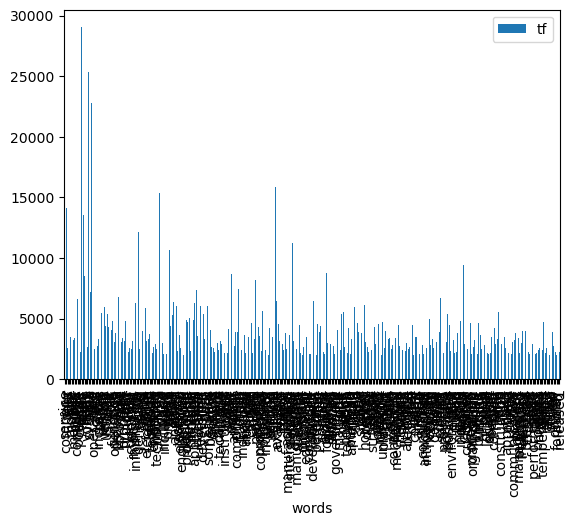

In [58]:
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

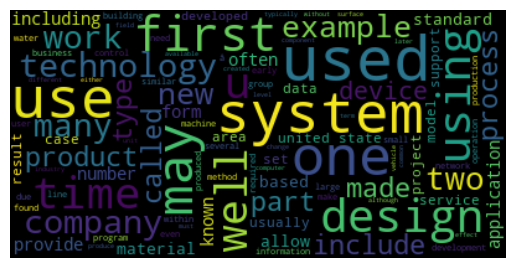

In [59]:
text = " ".join(i for i in df["text"])

wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()